# Multiple Linear Regression

## Bike sharing demand Assingment

### Problem Statement:
There is a company Boombikes and has suffered considerable dips due to corona. Now company wants to    understand the factors affecting the demand to increase their revenue. Here we build a multiple linear regression model to understand the various factors affecting the revenue and making predictions on those factors to accelerate the revenue of the company.

Essentially, the company wants —

- To identify the variables affecting Total_users, e.g. month, weekday, workingday, windspeed, temperature, etc.

- To create a linear model that quantitatively relates Total_users with variables such as Humidity, windspeed, weather, etc.

- To know the accuracy of the model, i.e. how well these variables describe the bike demands.

##  Step 1: Reading and Understanding the Data

In [385]:
# Importing Necessary Libraries for reading and understanding the data.

import numpy as np
import pandas as pd

# Importing warnings to stop the show of warnings boards.
import warnings
warnings.filterwarnings('ignore')

In [386]:
# Importing and reading the data.
shared_bikes = pd.read_csv('day.csv', index_col=0)
shared_bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [387]:
shared_bikes.tail()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [388]:
# Removing the index name
shared_bikes.index.name = None
shared_bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [389]:
#Renaming the cols for better understandings

shared_bikes.columns = ['Date', 'Season', 'Year', 'Month', 'Holiday', 'Weekday', 'Workingday', 'Weather', 'Temprature',
                       'Feel_temp', 'Humidity', 'Windspeed', 'Casual_users', 'Registered_users', 'Total_users']
shared_bikes.head()

,Date,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temprature,Feel_temp,Humidity,Windspeed,Casual_users,Registered_users,Total_users
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [390]:
# Checking the shape of the shared_bikes data
shared_bikes.shape

(730, 15)

In [391]:
# Check for Null values
shared_bikes.info()
print('From the info provoided on the data says that there are no missing values/ nul values.')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              730 non-null    object 
 1   Season            730 non-null    int64  
 2   Year              730 non-null    int64  
 3   Month             730 non-null    int64  
 4   Holiday           730 non-null    int64  
 5   Weekday           730 non-null    int64  
 6   Workingday        730 non-null    int64  
 7   Weather           730 non-null    int64  
 8   Temprature        730 non-null    float64
 9   Feel_temp         730 non-null    float64
 10  Humidity          730 non-null    float64
 11  Windspeed         730 non-null    float64
 12  Casual_users      730 non-null    int64  
 13  Registered_users  730 non-null    int64  
 14  Total_users       730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB
From the info provoided on the d

In [392]:
# Dropping Causal_users and Registered_users as their is total_users col which gives total number bike rental users and also dropping Date.
shared_bikes.drop(['Casual_users', 'Registered_users', 'Date'], axis=1, inplace=True)
shared_bikes.head()

,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temprature,Feel_temp,Humidity,Windspeed,Total_users
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [393]:
# Maping the categorical variables with more than 2levels like Season,Weekday, Month, Weather for better undesrtanding from visualisation.
shared_bikes['Season'] = shared_bikes['Season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
shared_bikes['Month'] = shared_bikes['Month'].map({1:'January', 2:'Febrauary', 3:'March', 4:'April', 5:'May', 6:'June',
                                                  7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
shared_bikes['Weekday'] = shared_bikes['Weekday'].map({1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday',
                                                      6:'Saturday', 0:'Sunday'})
shared_bikes['Weather'] = shared_bikes['Weather'].map({1:'Clear', 2:'Cloudy', 3:'Light_R/S', 4:'Heavy_R/S'})
shared_bikes['Holiday'] = shared_bikes['Holiday'].map({0:'No', 1:'Yes'})
shared_bikes['Workingday'] = shared_bikes['Workingday'].map({0:'Yes', 1:'No'})
shared_bikes.head()

,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temprature,Feel_temp,Humidity,Windspeed,Total_users
1,spring,0,January,No,Saturday,Yes,Cloudy,14.110847,18.18125,80.5833,10.749882,985
2,spring,0,January,No,Sunday,Yes,Cloudy,14.902598,17.68695,69.6087,16.652113,801
3,spring,0,January,No,Monday,No,Clear,8.050924,9.47025,43.7273,16.636703,1349
4,spring,0,January,No,Tuesday,No,Clear,8.200000,10.60610,59.0435,10.739832,1562
5,spring,0,January,No,Wednesday,No,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [394]:
shared_bikes.describe()

,Year,Temprature,Feel_temp,Humidity,Windspeed,Total_users
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step 2: Visualising the Data
- We will visualise our data using matplotlib and seaborn

In [395]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising numeric data 
 - check if there is any obvious multicoliniarity between the features and aslo to check if the data is linear to perform linear regression.
   

<Figure size 5000x4000 with 0 Axes>

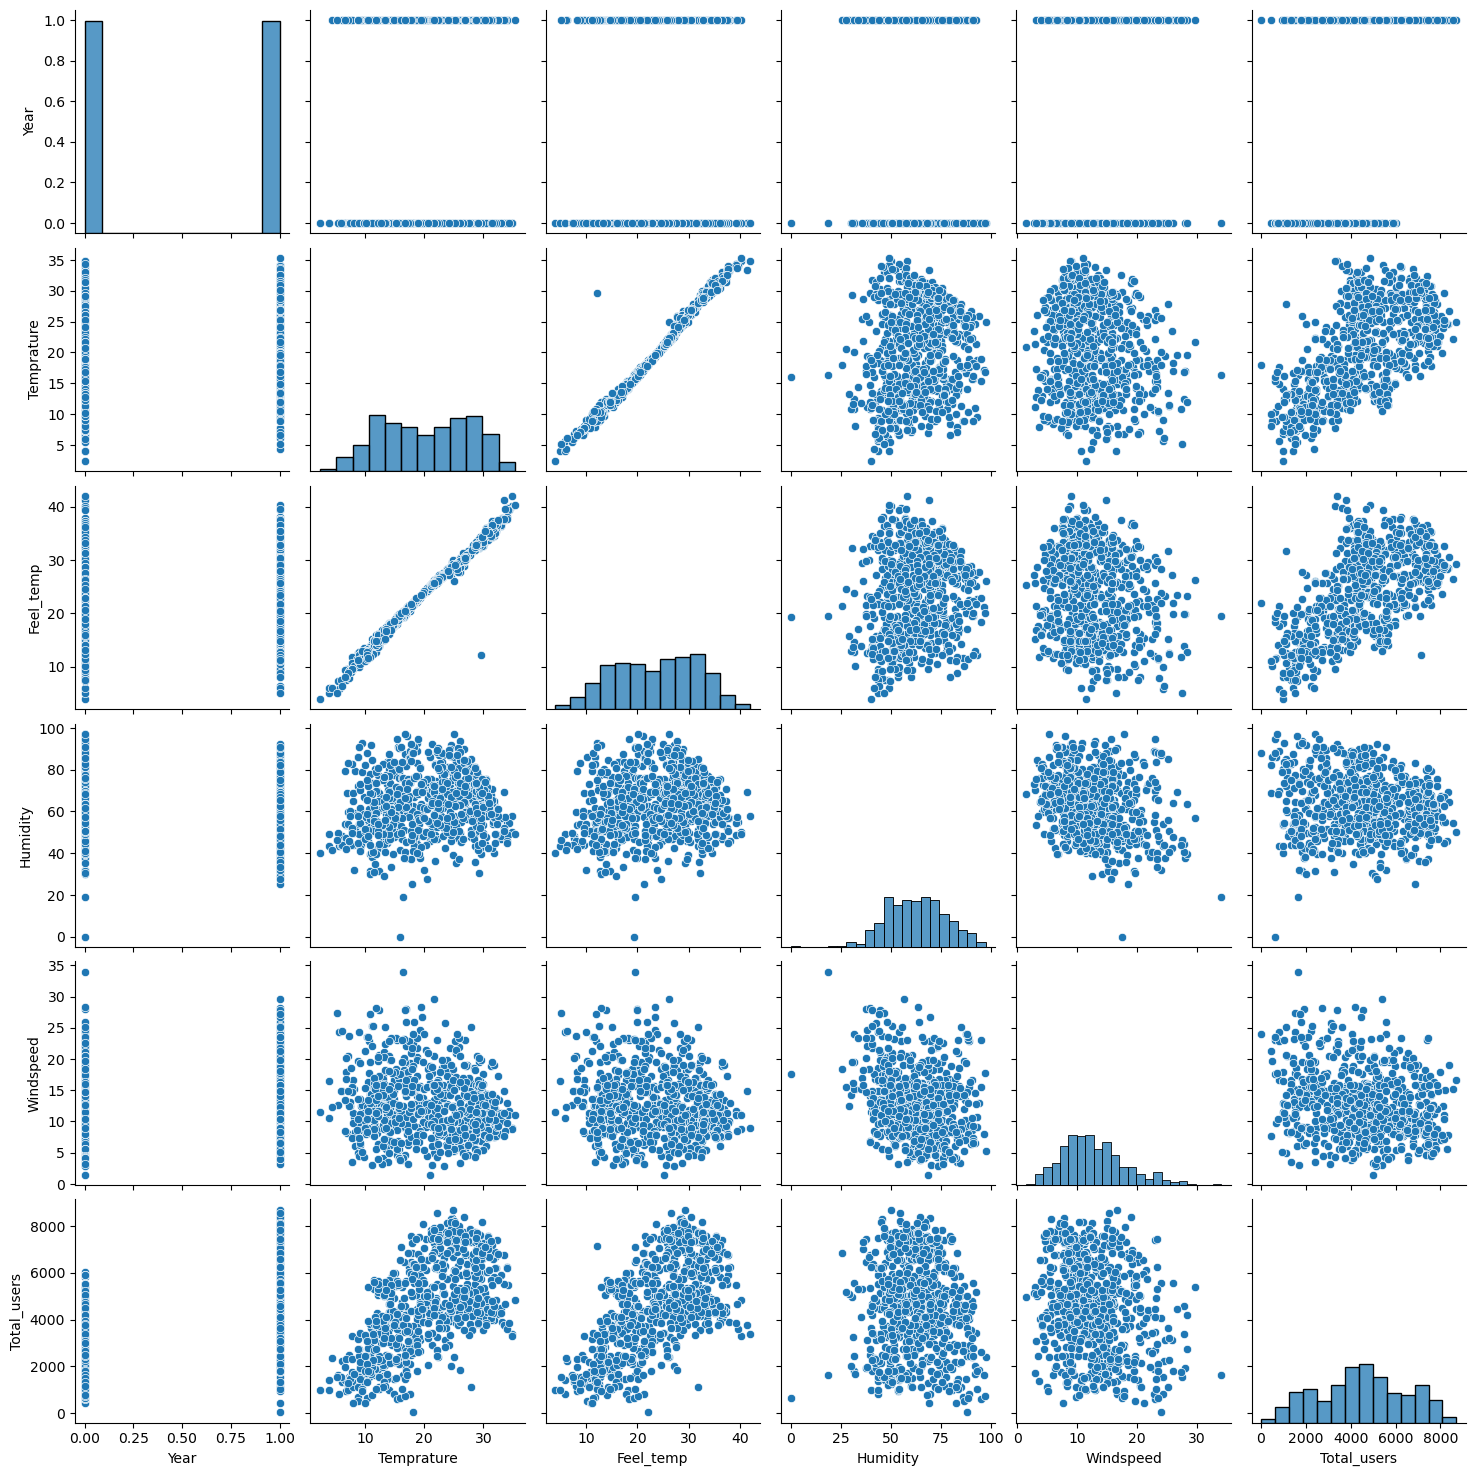

In [396]:
#Creating pairplot of all the numerical data
plt.figure(figsize=(50, 40))
sns.pairplot(shared_bikes)
plt.show()

#### Visualising Categorical variables


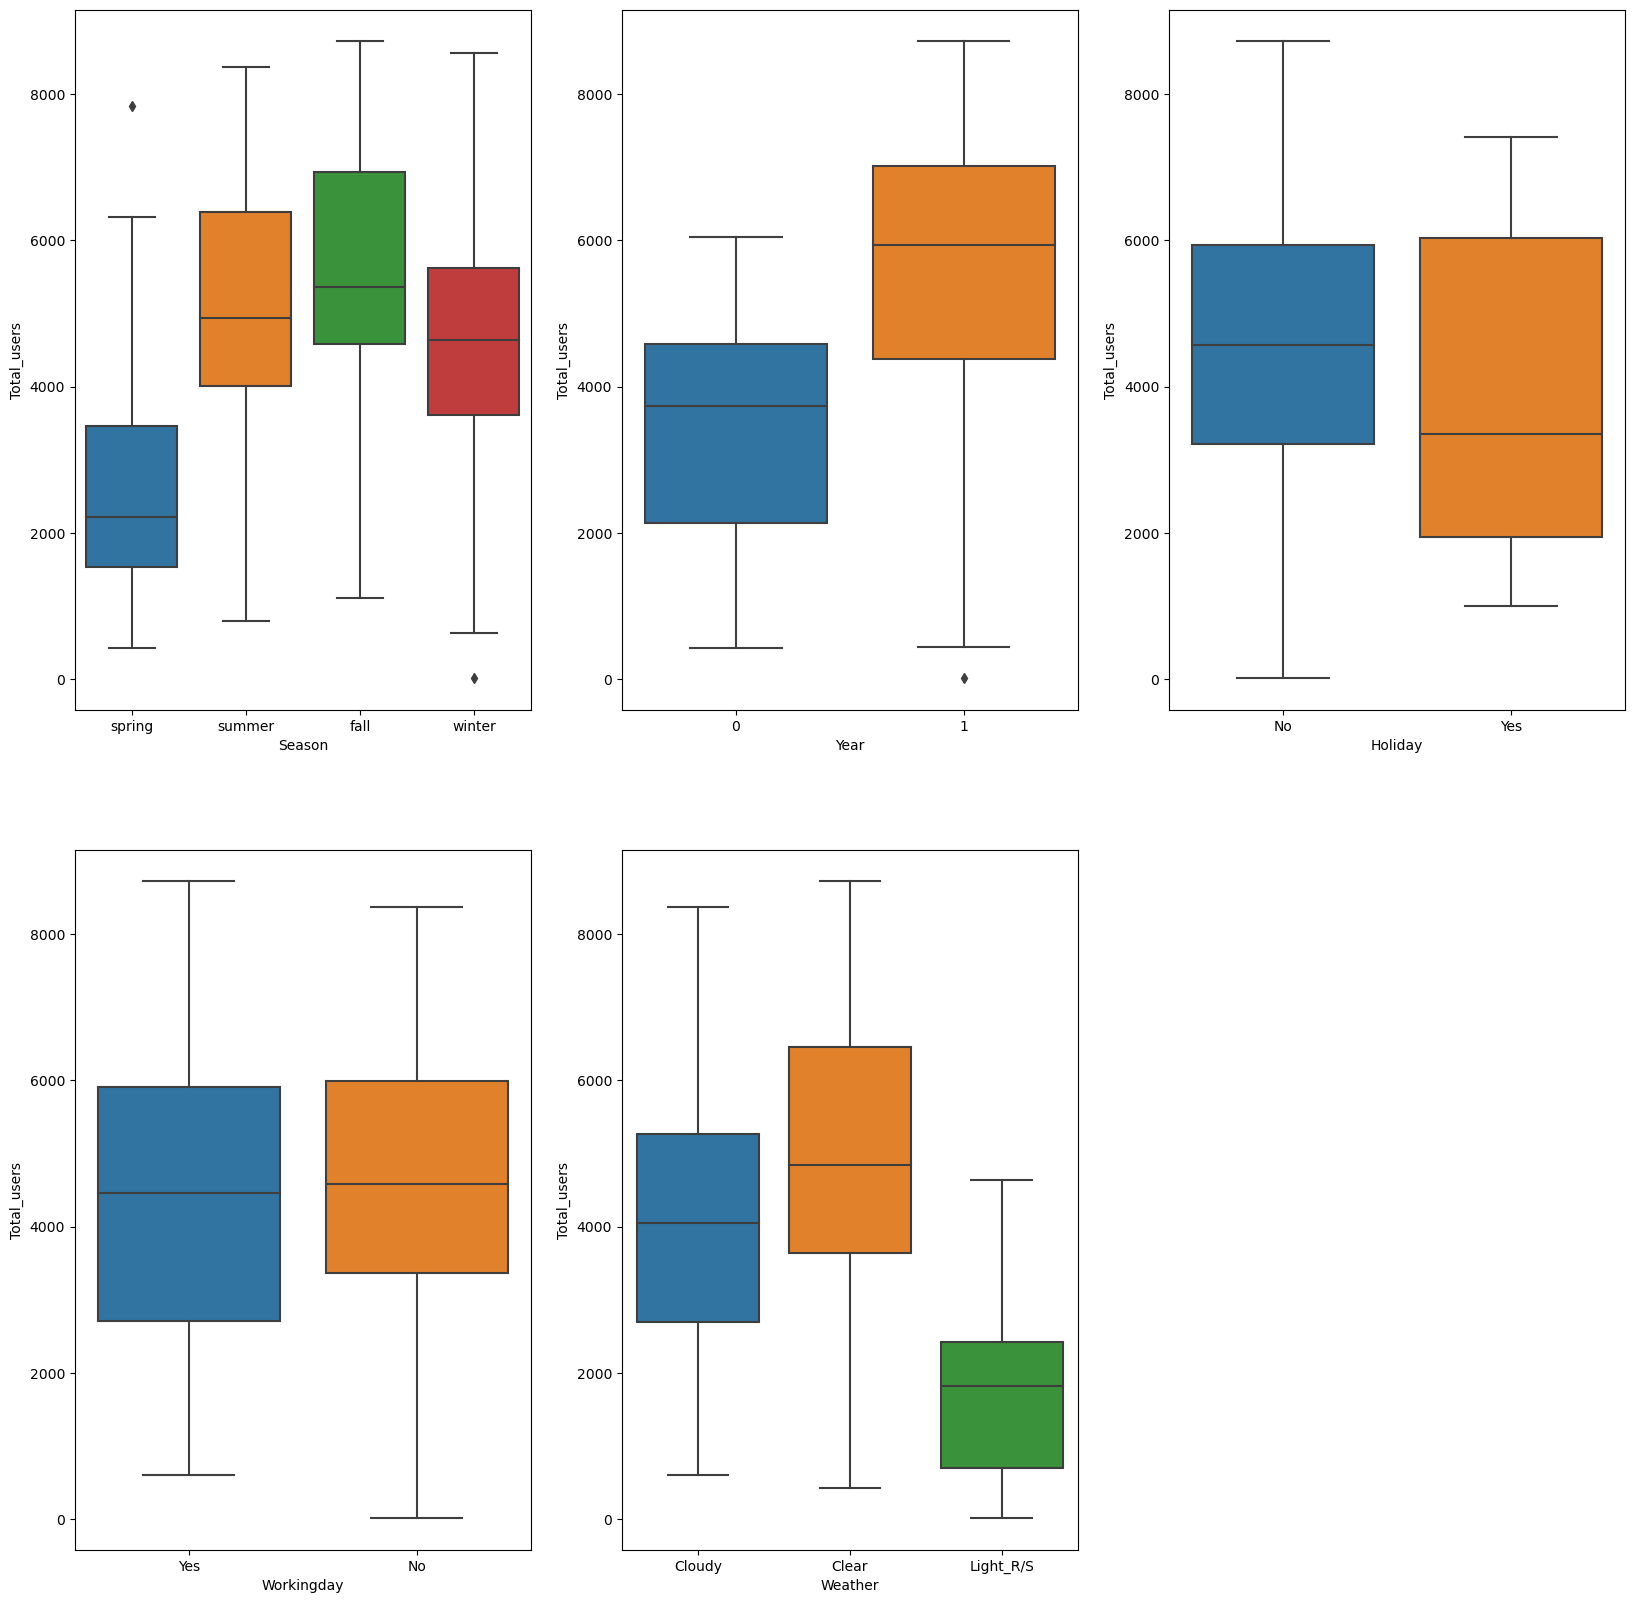

In [397]:
#visualising catergorical variable using box plot to check the influence of the vars on Total_users
plt.figure(figsize=(20, 20))
plt.subplot(2, 3, 1)
sns.boxplot(x='Season', y='Total_users', data=shared_bikes)
plt.subplot(2, 3, 2)
sns.boxplot(x='Year', y='Total_users', data=shared_bikes)
plt.subplot(2, 3, 3)
sns.boxplot(x='Holiday', y='Total_users', data=shared_bikes)
plt.subplot(2, 3, 4)
sns.boxplot(x='Workingday', y='Total_users', data=shared_bikes)
plt.subplot(2, 3, 5)
sns.boxplot(x='Weather', y='Total_users', data=shared_bikes)
plt.show()

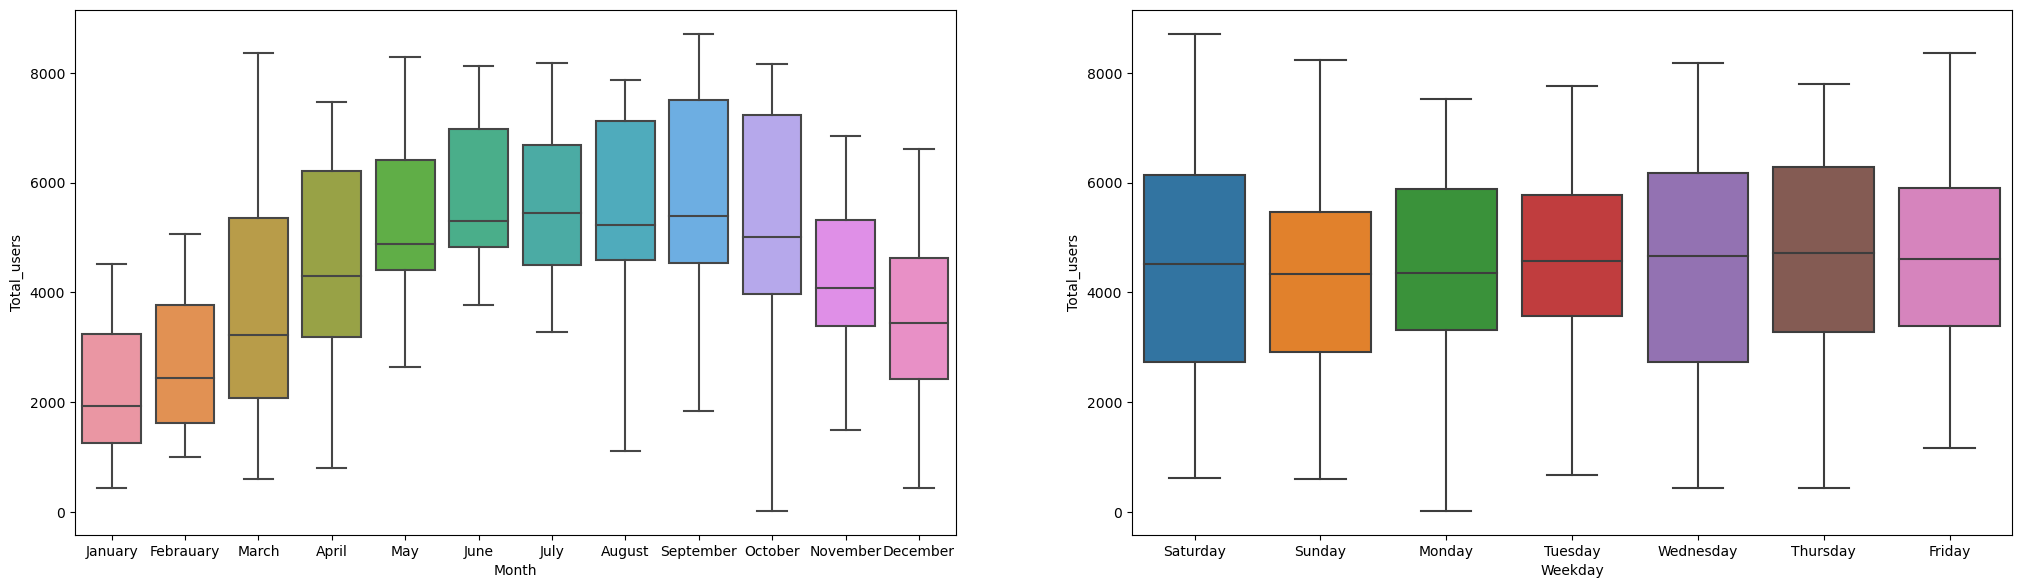

In [398]:
plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
sns.boxplot(x='Month', y='Total_users', data=shared_bikes)
plt.subplot(2, 2, 2)
sns.boxplot(x='Weekday', y='Total_users', data=shared_bikes)
plt.show()

## Step 3: Data Preperation

- To fit a Regression line, we need numeric variables not string. Hence, converting strings to numeric by creating dummy variables for the variables having more than 2levels.

In [399]:
# Converting all the binary variables from yes/no to 1/0
var_list = ['Holiday', 'Workingday']
shared_bikes[var_list] = shared_bikes[var_list].apply(lambda x: x.map({'Yes':1, 'No':0}))
shared_bikes[var_list].head()

,Holiday,Workingday
1,0,1
2,0,1
3,0,0
4,0,0
5,0,0


In [400]:
# Creating Dummies for the variables Season, Weather, Month and Weekday. Number of dummy varaibles are n-1 levels.
season = pd.get_dummies(shared_bikes['Season'], drop_first=True)
season.head()

,spring,summer,winter
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


In [401]:
# Creating dummies for Weather variable.
weather = pd.get_dummies(shared_bikes['Weather'], drop_first=True)
weather.head()

,Cloudy,Light_R/S
1,1,0
2,1,0
3,0,0
4,0,0
5,0,0


In [402]:
#Creating dummies for Month variables.
month = pd.get_dummies(shared_bikes['Month'], drop_first=True)
month.head()

,August,December,Febrauary,January,July,June,March,May,November,October,September
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0


In [403]:
#Creating dummies for Weekday variables.
weekday = pd.get_dummies(shared_bikes['Weekday'], drop_first=True)
weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


In [404]:
# Adding all the dummy variables to the shared_bikes dataframe.
shared_bikes = pd.concat([shared_bikes, season, weather, month, weekday], axis=1)

In [405]:
# Lets check the head of the new Dataframe.
shared_bikes.head()

,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temprature,Feel_temp,Humidity,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
1,spring,0,January,0,Saturday,1,Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
2,spring,0,January,0,Sunday,1,Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
3,spring,0,January,0,Monday,0,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
4,spring,0,January,0,Tuesday,0,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
5,spring,0,January,0,Wednesday,0,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [406]:
# Dropping Season, Month, Weekday, Weather as we have created dummy variables for these varibales.
shared_bikes.drop(['Season', 'Month', 'Weather', 'Weekday'], axis=1, inplace=True)
shared_bikes.head()

,Year,Holiday,Workingday,Temprature,Feel_temp,Humidity,Windspeed,Total_users,spring,summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
1,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


## Step 3: Splitting the data into train and test sets.

In [407]:
# importing train_test_split from Sklearn package
from sklearn.model_selection import train_test_split

In [408]:
#Splitting the data into train and test
df_train, df_test = train_test_split(shared_bikes, train_size=0.7, random_state=100)

#checking the shape of train and test to if the split is 70/30 in ratio
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescalling

In [409]:
# Importing MinMax Scaller from sklearn.
from sklearn.preprocessing import MinMaxScaler

In [410]:
# Performing Rescalling the variables with high interger values to comparable scale of values.
# Creating a MinMaxscaler object
scaler = MinMaxScaler()

In [411]:
# Applying MinMax scaler to all the varaibles expect Dummy and yes/no variables  
scale_list = ['Temprature', 'Feel_temp', 'Humidity', 'Windspeed', 'Total_users']

# Fitting and Transfporming the variables for training set.
df_train[scale_list] = scaler.fit_transform(df_train[scale_list])

In [412]:
df_train.head()

,Year,Holiday,Workingday,Temprature,Feel_temp,Humidity,Windspeed,Total_users,spring,summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
577,1,0,0,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
427,1,0,1,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
729,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
483,1,0,1,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0
112,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,0


In [413]:
df_train.describe()

,Year,Holiday,Workingday,Temprature,Feel_temp,Humidity,Windspeed,Total_users,spring,summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.323529,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


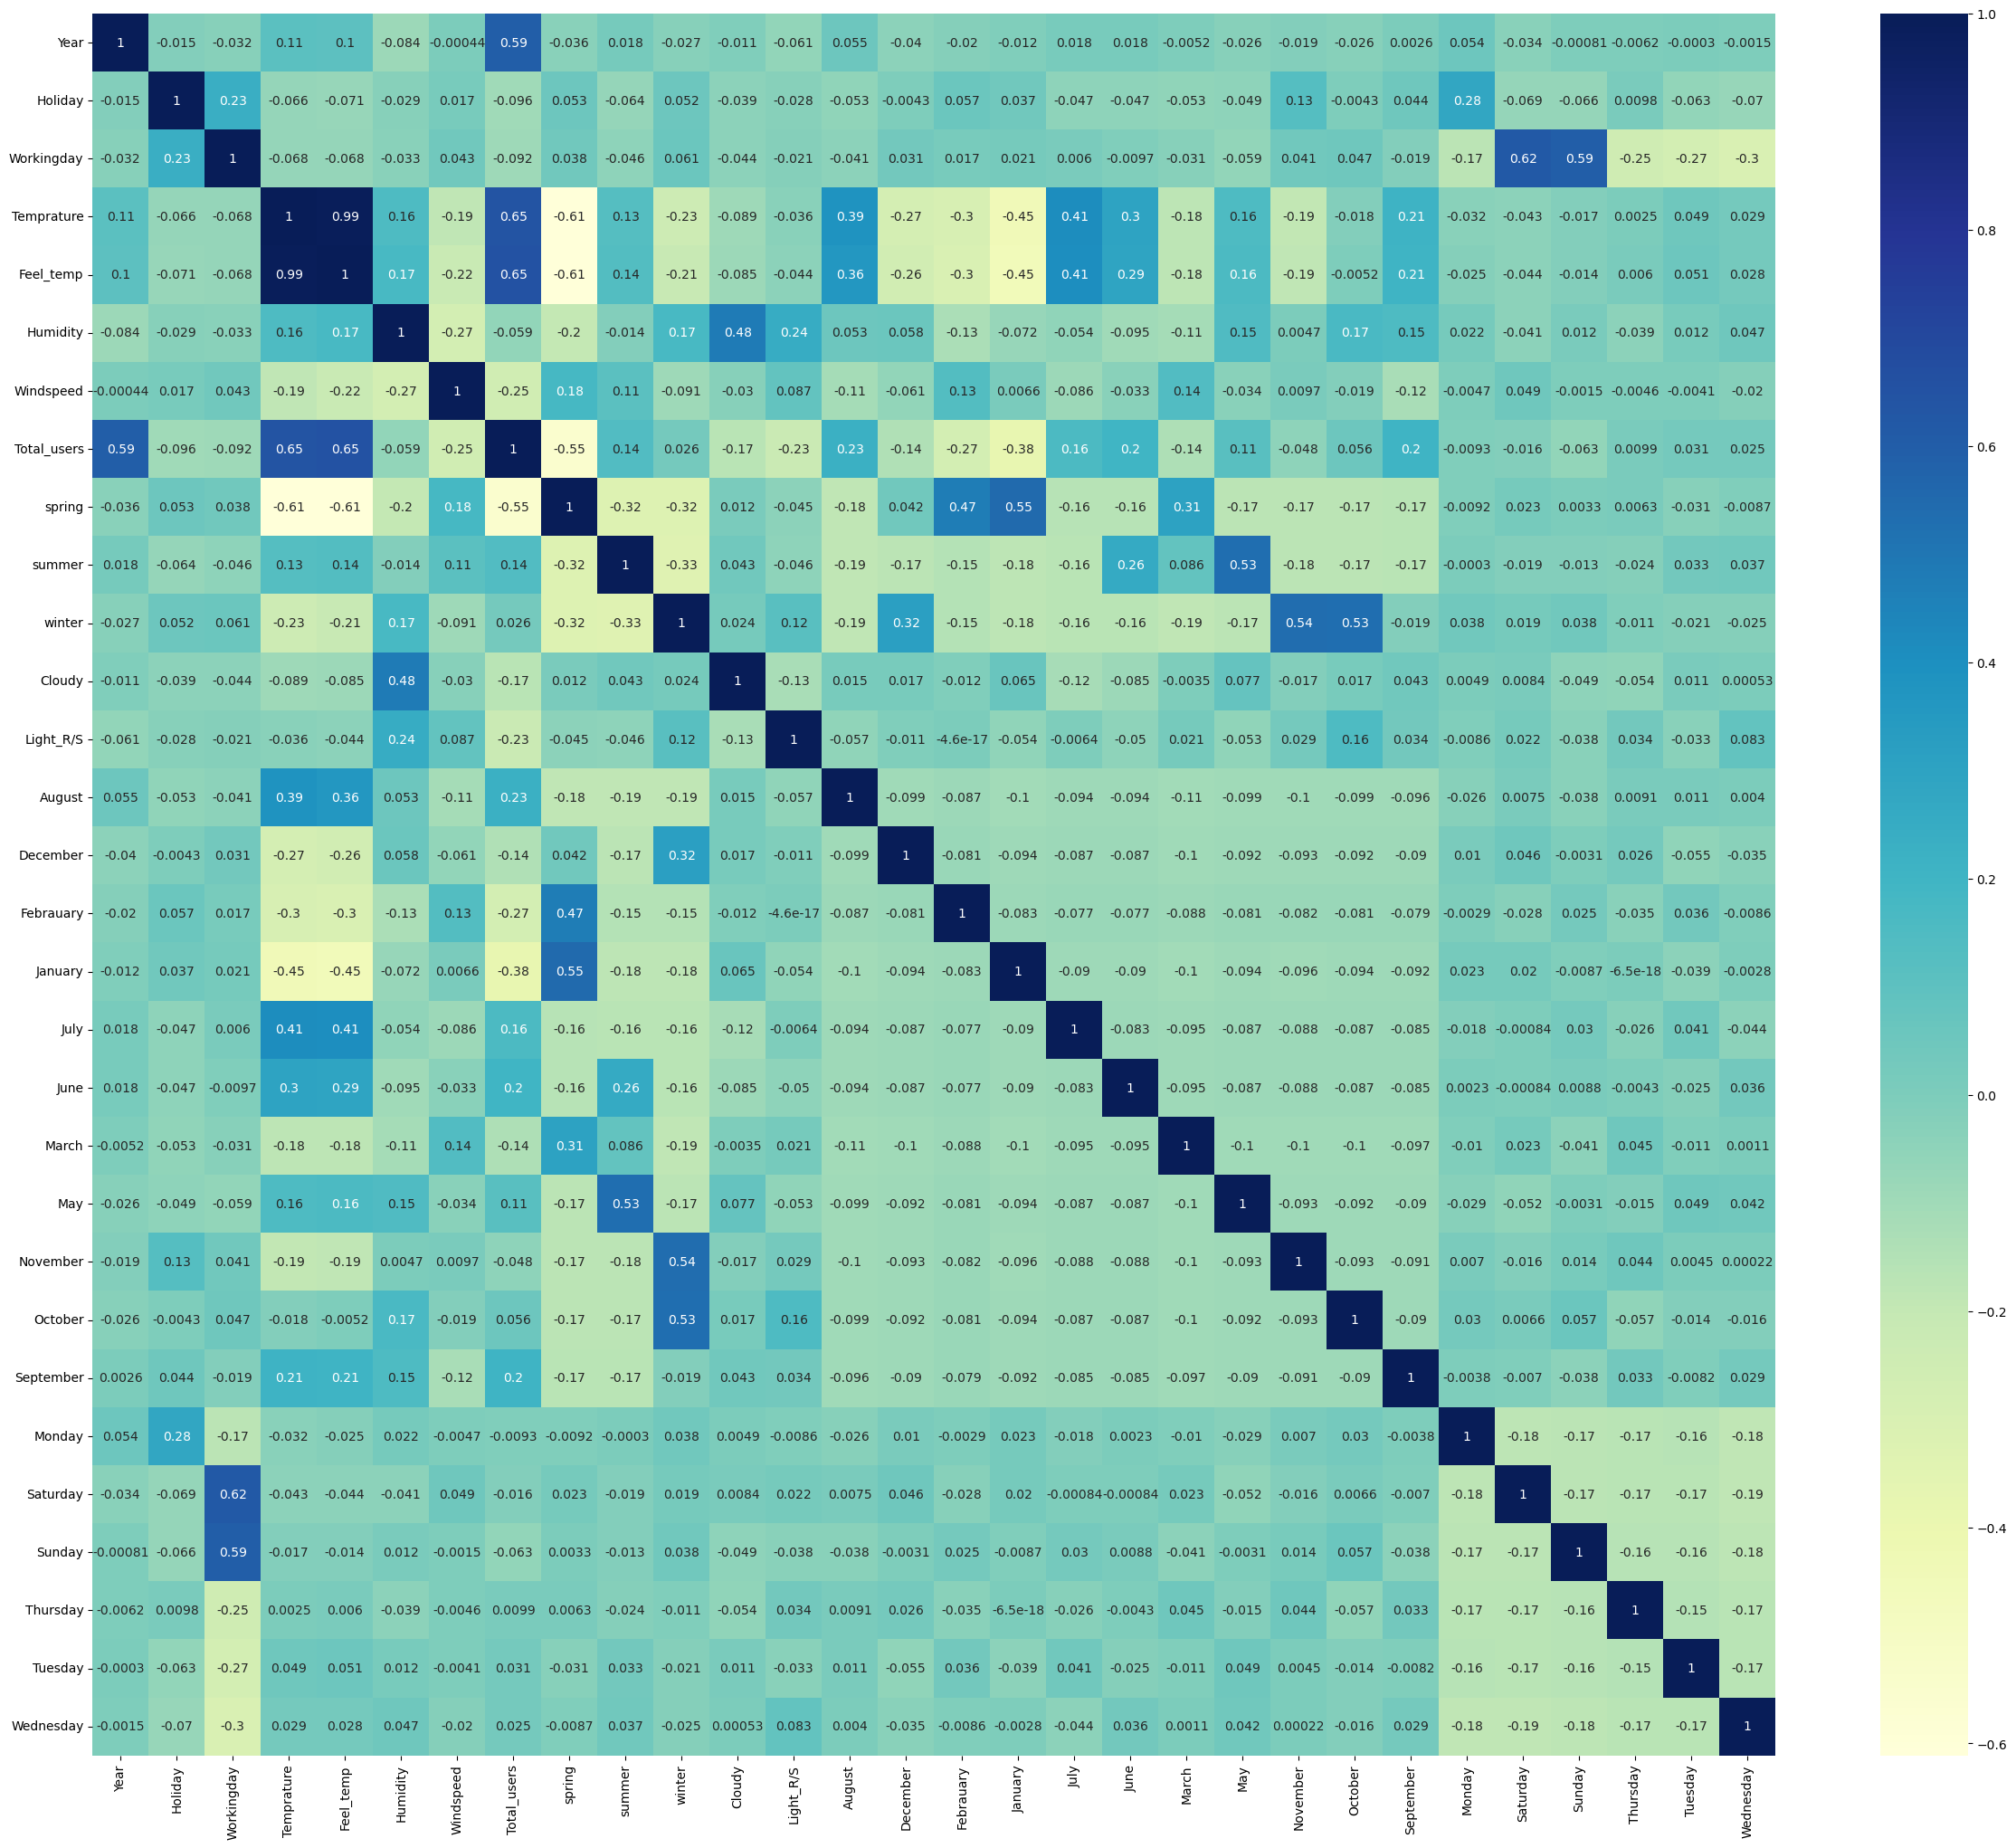

In [414]:
# Lets check for Correlation coefficient to see which varaibales are highly correlated 
plt.figure(figsize=(30, 25))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

##### From the above heatmap we can observe the following
- Total_users and Temprature are correlated.
- Temprature and Feel_temp are also highly correlated with each other.

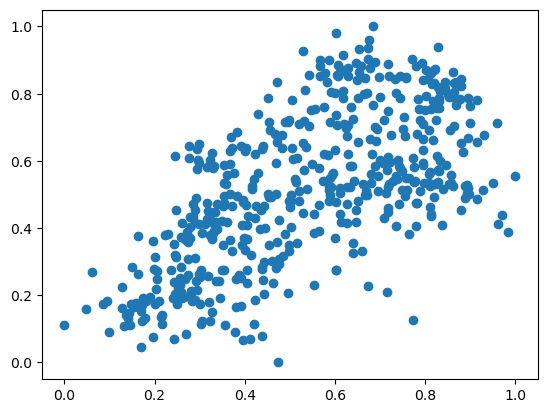

In [415]:
# Lets plot Total_users and Temperature to confirm if there is linear realtionship.

plt.scatter(df_train.Temprature, df_train.Total_users)
plt.show()

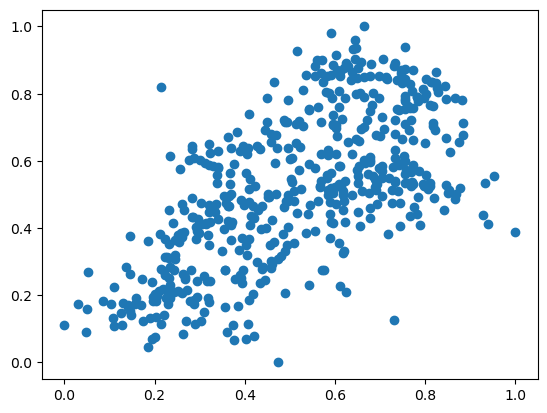

In [416]:
# Checking the same for Feel_temp
plt.scatter(df_train.Feel_temp,  df_train.Total_users)
plt.show()

Lets take Temprature as the first varaible and try to fit a regression line, as it is highly correlated to the Total_users.

In [417]:
# Dividing the training set into X and Y
y_train = df_train.pop('Total_users')
x_train = df_train

## Step 4: Building a Linear Model

Lets fit a regression line to the training set using statsmodel library.

In [418]:
# Importing statsmodel
import statsmodels.api as sm

In [419]:
# Adding constant manualy to the training set as model does not add constant.
x_train_lm = sm.add_constant(x_train['Temprature'])
x_train_lm.head()

,const,Temprature
577,1.0,0.815169
427,1.0,0.442393
729,1.0,0.245101
483,1.0,0.395666
112,1.0,0.345824


In [420]:
# Building Linear Model
# Creat an lm object
lm = sm.OLS(y_train, x_train_lm)

# Fit() the model
lm_model1 = lm.fit()

In [421]:
# Checking the parameters for the fit line
lm_model1.params

const         0.169031
Temprature    0.640944
dtype: float64

In [422]:
# Lets check the model summary
lm_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_users   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           2.46e-61
Time:                        17:39:47   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
Temprature     0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

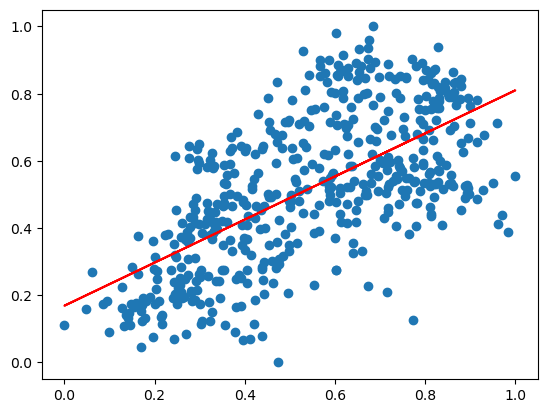

In [423]:
# Now lets see how the line is fitted to the data from scatter plot.
plt.figure()
plt.scatter(x_train_lm.iloc[:,1], y_train)
plt.plot(x_train_lm.iloc[:,1], 0.169+0.641*x_train_lm.iloc[:,1], 'r')
plt.show()

### Adding another variable

 From the model summary we can infer that the R-squared value is 0.416 which is less. Since there are more varibales that can influence the R-squared lets add another variable which has the second highest correlation and check the R-Squared.
 

In [424]:
# Assining the variables to x
x_train_lm = x_train[['Temprature', 'Feel_temp']]

# Adding constant
x_train_lm = sm.add_constant(x_train_lm)
x_train_lm.head()

,const,Temprature,Feel_temp
577,1.0,0.815169,0.766351
427,1.0,0.442393,0.438975
729,1.0,0.245101,0.200348
483,1.0,0.395666,0.391735
112,1.0,0.345824,0.318819


In [425]:
# Building Linear Model

# Creating an lm object
lm = sm.OLS(y_train, x_train_lm)

# Fit() the model
lm_model2 = lm.fit()

#Parameters of Linear model
lm_model2.params

const         0.162664
Temprature    0.185345
Feel_temp     0.489566
dtype: float64

In [426]:
lm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_users   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           8.38e-61
Time:                        17:39:47   Log-Likelihood:                 178.05
No. Observations:                 510   AIC:                            -350.1
Df Residuals:                     507   BIC:                            -337.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1627      0.020      8.198      0.000       0.124       0.202
Temprature     0.1853      0.233      0.796      0.426      -0.272       0.643
Feel_temp      0.4896      0.248      1.977      0.049       0.003       0.976
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.696
Skew:                           0.070   Prob(JB):                        0.158
Kurtosis:                       2.607   Cond. No.                         56.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By adding Feel_temp variable to the model, the model's R-Squared has slightly increased to 0.421

### Adding all the variables 

In [427]:
# Assining all the variables excluding Date Column
x_train_lm = sm.add_constant(x_train)
x_train_lm.head()

,const,Year,Holiday,Workingday,Temprature,Feel_temp,Humidity,Windspeed,spring,summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
577,1.0,1,0,0,0.815169,0.766351,0.725633,0.264686,0,0,...,0,0,0,0,0,0,0,0,1,0
427,1.0,1,0,1,0.442393,0.438975,0.640189,0.255342,1,0,...,0,0,0,0,0,1,0,0,0,0
729,1.0,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,...,0,0,0,0,0,0,1,0,0,0
483,1.0,1,0,1,0.395666,0.391735,0.504508,0.188475,0,1,...,0,0,0,0,0,1,0,0,0,0
112,1.0,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,...,0,0,0,0,0,0,0,0,0,0


In [428]:
# Building Linear Model

# Creating an lm object
lm = sm.OLS(y_train, x_train_lm)

# Fit() the model
lm_model = lm.fit()

#Parameters of Linear model
lm_model.params

const         0.339571
Year          0.232539
Holiday      -0.049933
Workingday   -0.035448
Temprature    0.387984
Feel_temp     0.059045
Humidity     -0.152016
Windspeed    -0.183604
spring       -0.045355
summer        0.042369
winter        0.107081
Cloudy       -0.059521
Light_R/S    -0.254975
August        0.022270
December     -0.044274
Febrauary    -0.032316
January      -0.063064
July         -0.032657
June          0.006012
March         0.001555
May           0.025541
November     -0.039818
October       0.007713
September     0.086761
Monday       -0.021624
Saturday      0.034352
Sunday       -0.019867
Thursday     -0.009730
Tuesday      -0.018439
Wednesday    -0.005897
dtype: float64

In [429]:
# Checking the statistical values of the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_users   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.81e-180
Time:                        17:39:47   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3396      0.044      7.693      0.000       0.253       0.426
Year           0.2325      0.008     28.794      0.000       0.217       0.248
Holiday       -0.0499      0.021     -2.387      0.017      -0.091      -0.009
Workingday    -0.0354      0.010     -3.703      0.000      -0.054      -0.017
Temprature     0.3880      0.142      2.727      0.007       0.108       0.668
Feel_temp      0.0590      0.138      0.426      0.670      -0.213       0.331
Humidity      -0.1520      0.039     -3.938      0.000      -0.228      -0.076
Windspeed     -0.1836      0.026     -6.962      0.000      -0.235      -0.132
spring        -0.0454      0.030     -1.511      0.131      -0.104       0.014
summer         0.0424      0.026      1.617      0.107      -0.009       0.094
winter         0.1071      0.028      3.826      0.000       0.052       0.162
Cloudy        -0.0595      0.010     -5.701      0.000      -0.080      -0.039
Light_R/S     -0.2550      0.026     -9.631      0.000      -0.307      -0.203
August         0.0223      0.034      0.657      0.511      -0.044       0.089
December      -0.0443      0.034     -1.316      0.189      -0.110       0.022
Febrauary     -0.0323      0.033     -0.980      0.327      -0.097       0.032
January       -0.0631      0.034     -1.876      0.061      -0.129       0.003
July          -0.0327      0.035     -0.931      0.352      -0.102       0.036
June           0.0060      0.025      0.241      0.810      -0.043       0.055
March          0.0016      0.025      0.063      0.950      -0.047       0.050
May            0.0255      0.021      1.208      0.228      -0.016       0.067
November      -0.0398      0.036     -1.093      0.275      -0.111       0.032
October        0.0077      0.036      0.215      0.830      -0.063       0.078
September      0.0868      0.032      2.711      0.007       0.024       0.150
Monday        -0.0216      0.015     -1.401      0.162      -0.052       0.009
Saturday       0.0344      0.012      2.933      0.004       0.011       0.057
Sunday        -0.0199      0.012     -1.673      0.095      -0.043       0.003
Thursday      -0.0097      0.016     -0.623      0.534      -0.040       0.021
Tuesday       -0.0184      0.016     -1.184      0.237      -0.049       0.012
Wednesday     -0.0059      0.015     -0.394      0.694      -0.035       0.023
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                     1.46e+15
==============================================================================

N

Looking at the P-values we can conclude that there are variables with high P-value which are insignificant in the pressence of other variables hence we remove the variables with high P-vaue one by one by also considering the VIF value for corresponding variables.

### Computing VIF

In [430]:
# Importing VIF from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [431]:
# Lets creat a DataFrame that contains all the features and their corresponding VIF values
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,Sunday,inf
2,Workingday,inf
1,Holiday,inf
24,Saturday,inf
3,Temprature,433.89
4,Feel_temp,383.58
5,Humidity,38.22
7,spring,11.79
9,winter,11.69
8,summer,6.91


We want the varaibles which has VIF less than 5. Clearly here there are more variables with high VIF which we have to drop.

### Dropping the variables and updating the models

Looking at the P-value and VIF value, we can notice that March month has very high P-value and Low VIF. We remove the variable that has high P-value.

In [432]:
x_train.columns

Index(['Year', 'Holiday', 'Workingday', 'Temprature', 'Feel_temp', 'Humidity',
       'Windspeed', 'spring', 'summer', 'winter', 'Cloudy', 'Light_R/S',
       'August', 'December', 'Febrauary', 'January', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [433]:
x = x_train.drop('March', axis=1)

In [434]:
# Creating another model
x_train_sm = sm.add_constant(x)

# Creating an lm object
lm = sm.OLS(y_train, x_train_sm)

# Fit() the model
lm_model = lm.fit()

#Summary of the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_users   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.75e-181
Time:                        17:39:47   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3406      0.041      8.255      0.000       0.259       0.422
Year           0.2325      0.008     28.824      0.000       0.217       0.248
Holiday       -0.0500      0.021     -2.391      0.017      -0.091      -0.009
Workingday    -0.0355      0.010     -3.708      0.000      -0.054      -0.017
Temprature     0.3877      0.142      2.729      0.007       0.109       0.667
Feel_temp      0.0588      0.138      0.425      0.671      -0.213       0.330
Humidity      -0.1518      0.038     -3.950      0.000      -0.227      -0.076
Windspeed     -0.1837      0.026     -6.983      0.000      -0.235      -0.132
spring        -0.0447      0.028     -1.575      0.116      -0.101       0.011
summer         0.0421      0.026      1.637      0.102      -0.008       0.093
winter         0.1074      0.027      3.910      0.000       0.053       0.161
Cloudy        -0.0595      0.010     -5.708      0.000      -0.080      -0.039
Light_R/S     -0.2550      0.026     -9.641      0.000      -0.307      -0.203
August         0.0216      0.032      0.676      0.499      -0.041       0.084
December      -0.0456      0.026     -1.755      0.080      -0.097       0.005
Febrauary     -0.0338      0.022     -1.517      0.130      -0.078       0.010
January       -0.0646      0.022     -2.892      0.004      -0.109      -0.021
July          -0.0333      0.033     -0.999      0.318      -0.099       0.032
June           0.0055      0.024      0.233      0.816      -0.041       0.052
May            0.0251      0.020      1.268      0.205      -0.014       0.064
November      -0.0410      0.031     -1.333      0.183      -0.102       0.019
October        0.0065      0.031      0.213      0.831      -0.054       0.067
September      0.0859      0.029      2.961      0.003       0.029       0.143
Monday        -0.0216      0.015     -1.402      0.162      -0.052       0.009
Saturday       0.0344      0.012      2.939      0.003       0.011       0.057
Sunday        -0.0199      0.012     -1.676      0.094      -0.043       0.003
Thursday      -0.0097      0.016     -0.622      0.535      -0.040       0.021
Tuesday       -0.0184      0.016     -1.185      0.237      -0.049       0.012
Wednesday     -0.0059      0.015     -0.394      0.694      -0.035       0.023
==============================================================================
Omnibus:                       84.449   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.878
Skew:                          -0.804   Prob(JB):                     9.93e-52
Kurtosis:                       5.910   Cond. No.                     1.43e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [435]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,Sunday,inf
2,Workingday,inf
23,Saturday,inf
1,Holiday,inf
3,Temprature,433.41
4,Feel_temp,383.13
5,Humidity,36.29
9,winter,10.57
7,spring,8.25
8,summer,6.90


In [436]:
# Dropping columns with high P-values
x = x.drop(['June', 'October', 'Wednesday', 'Thursday'], axis=1)

In [437]:
# Creating another model
x_train_sm = sm.add_constant(x)

# Creating an lm object
lm = sm.OLS(y_train, x_train_sm)

# Fit() the model
lm_model = lm.fit()

#Summary of the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_users   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.54e-185
Time:                        17:39:47   Log-Likelihood:                 526.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3375      0.039      8.545      0.000       0.260       0.415
Year           0.2323      0.008     29.053      0.000       0.217       0.248
Holiday       -0.0528      0.020     -2.615      0.009      -0.092      -0.013
Workingday    -0.0328      0.008     -3.968      0.000      -0.049      -0.017
Temprature     0.4031      0.135      2.993      0.003       0.139       0.668
Feel_temp      0.0477      0.136      0.351      0.726      -0.219       0.315
Humidity      -0.1523      0.038     -4.033      0.000      -0.227      -0.078
Windspeed     -0.1845      0.026     -7.106      0.000      -0.235      -0.133
spring        -0.0473      0.027     -1.773      0.077      -0.100       0.005
summer         0.0394      0.023      1.685      0.093      -0.007       0.085
winter         0.1091      0.023      4.788      0.000       0.064       0.154
Cloudy        -0.0590      0.010     -5.705      0.000      -0.079      -0.039
Light_R/S     -0.2558      0.026     -9.738      0.000      -0.307      -0.204
August         0.0159      0.024      0.670      0.503      -0.031       0.062
December      -0.0493      0.018     -2.710      0.007      -0.085      -0.014
Febrauary     -0.0340      0.021     -1.587      0.113      -0.076       0.008
January       -0.0648      0.021     -3.053      0.002      -0.107      -0.023
July          -0.0389      0.025     -1.580      0.115      -0.087       0.009
May            0.0230      0.017      1.328      0.185      -0.011       0.057
November      -0.0467      0.019     -2.474      0.014      -0.084      -0.010
September      0.0802      0.021      3.742      0.000       0.038       0.122
Monday        -0.0162      0.012     -1.328      0.185      -0.040       0.008
Saturday       0.0371      0.011      3.478      0.001       0.016       0.058
Sunday        -0.0171      0.011     -1.575      0.116      -0.038       0.004
Tuesday       -0.0132      0.012     -1.063      0.288      -0.038       0.011
==============================================================================
Omnibus:                       83.227   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.995
Skew:                          -0.796   Prob(JB):                     1.88e-50
Kurtosis:                       5.871   Cond. No.                     1.42e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.51e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [438]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Workingday,inf
22,Sunday,inf
1,Holiday,inf
21,Saturday,inf
3,Temprature,390.18
4,Feel_temp,373.23
5,Humidity,33.95
7,spring,7.23
9,winter,5.97
8,summer,5.80


In [439]:
# Dropping columns with high P-value
x = x.drop('Feel_temp', axis=1)

In [440]:
# Creating another model
x_train_sm = sm.add_constant(x)

# Creating an lm object
lm = sm.OLS(y_train, x_train_sm)

# Fit() the model
lm_model = lm.fit()

#Summary of the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_users   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.36e-186
Time:                        17:39:47   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3373      0.039      8.548      0.000       0.260       0.415
Year           0.2322      0.008     29.077      0.000       0.217       0.248
Holiday       -0.0532      0.020     -2.644      0.008      -0.093      -0.014
Workingday    -0.0328      0.008     -3.983      0.000      -0.049      -0.017
Temprature     0.4484      0.038     11.686      0.000       0.373       0.524
Humidity      -0.1516      0.038     -4.024      0.000      -0.226      -0.078
Windspeed     -0.1863      0.025     -7.327      0.000      -0.236      -0.136
spring        -0.0466      0.027     -1.753      0.080      -0.099       0.006
summer         0.0401      0.023      1.726      0.085      -0.006       0.086
winter         0.1099      0.023      4.851      0.000       0.065       0.154
Cloudy        -0.0591      0.010     -5.719      0.000      -0.079      -0.039
Light_R/S     -0.2565      0.026     -9.797      0.000      -0.308      -0.205
August         0.0152      0.024      0.645      0.520      -0.031       0.062
December      -0.0492      0.018     -2.709      0.007      -0.085      -0.014
Febrauary     -0.0340      0.021     -1.590      0.112      -0.076       0.008
January       -0.0650      0.021     -3.066      0.002      -0.107      -0.023
July          -0.0389      0.025     -1.583      0.114      -0.087       0.009
May            0.0228      0.017      1.317      0.188      -0.011       0.057
November      -0.0466      0.019     -2.472      0.014      -0.084      -0.010
September      0.0803      0.021      3.747      0.000       0.038       0.122
Monday        -0.0160      0.012     -1.310      0.191      -0.040       0.008
Saturday       0.0373      0.011      3.501      0.001       0.016       0.058
Sunday        -0.0169      0.011     -1.562      0.119      -0.038       0.004
Tuesday       -0.0131      0.012     -1.052      0.293      -0.037       0.011
==============================================================================
Omnibus:                       82.702   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.333
Skew:                          -0.792   Prob(JB):                     4.32e-50
Kurtosis:                       5.862   Cond. No.                     1.34e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.58e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [441]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Workingday,inf
21,Sunday,inf
1,Holiday,inf
20,Saturday,inf
4,Humidity,33.87
3,Temprature,21.20
6,spring,7.18
8,winter,5.90
7,summer,5.74
5,Windspeed,4.94


In [442]:
# Dropping columns with high P-value
x = x.drop('Holiday', axis=1)

In [443]:
# Creating another model
x_train_sm = sm.add_constant(x)

# Creating an lm object
lm = sm.OLS(y_train, x_train_sm)

# Fit() the model
lm_model = lm.fit()

#Summary of the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_users   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.36e-186
Time:                        17:39:48   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3373      0.039      8.548      0.000       0.260       0.415
Year           0.2322      0.008     29.077      0.000       0.217       0.248
Workingday    -0.0861      0.026     -3.269      0.001      -0.138      -0.034
Temprature     0.4484      0.038     11.686      0.000       0.373       0.524
Humidity      -0.1516      0.038     -4.024      0.000      -0.226      -0.078
Windspeed     -0.1863      0.025     -7.327      0.000      -0.236      -0.136
spring        -0.0466      0.027     -1.753      0.080      -0.099       0.006
summer         0.0401      0.023      1.726      0.085      -0.006       0.086
winter         0.1099      0.023      4.851      0.000       0.065       0.154
Cloudy        -0.0591      0.010     -5.719      0.000      -0.079      -0.039
Light_R/S     -0.2565      0.026     -9.797      0.000      -0.308      -0.205
August         0.0152      0.024      0.645      0.520      -0.031       0.062
December      -0.0492      0.018     -2.709      0.007      -0.085      -0.014
Febrauary     -0.0340      0.021     -1.590      0.112      -0.076       0.008
January       -0.0650      0.021     -3.066      0.002      -0.107      -0.023
July          -0.0389      0.025     -1.583      0.114      -0.087       0.009
May            0.0228      0.017      1.317      0.188      -0.011       0.057
November      -0.0466      0.019     -2.472      0.014      -0.084      -0.010
September      0.0803      0.021      3.747      0.000       0.038       0.122
Monday        -0.0160      0.012     -1.310      0.191      -0.040       0.008
Saturday       0.0905      0.028      3.175      0.002       0.034       0.146
Sunday         0.0363      0.029      1.268      0.205      -0.020       0.092
Tuesday       -0.0131      0.012     -1.052      0.293      -0.037       0.011
==============================================================================
Omnibus:                       82.702   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.333
Skew:                          -0.792   Prob(JB):                     4.32e-50
Kurtosis:                       5.862   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [444]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Humidity,33.87
2,Temprature,21.20
1,Workingday,14.71
19,Saturday,8.23
20,Sunday,7.68
5,spring,7.18
7,winter,5.90
6,summer,5.74
4,Windspeed,4.94
10,August,3.12


In [445]:
# Dropping columns with high P-value
x = x.drop('August', axis=1)

In [446]:
# Creating another model
x_train_sm = sm.add_constant(x)

# Creating an lm object
lm = sm.OLS(y_train, x_train_sm)

# Fit() the model
lm_model = lm.fit()

#Summary of the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_users   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.47e-187
Time:                        17:39:48   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3458      0.037      9.304      0.000       0.273       0.419
Year           0.2324      0.008     29.128      0.000       0.217       0.248
Workingday    -0.0863      0.026     -3.282      0.001      -0.138      -0.035
Temprature     0.4502      0.038     11.769      0.000       0.375       0.525
Humidity      -0.1505      0.038     -4.001      0.000      -0.224      -0.077
Windspeed     -0.1864      0.025     -7.338      0.000      -0.236      -0.137
spring        -0.0564      0.022     -2.576      0.010      -0.099      -0.013
summer         0.0298      0.017      1.766      0.078      -0.003       0.063
winter         0.1009      0.018      5.663      0.000       0.066       0.136
Cloudy        -0.0588      0.010     -5.703      0.000      -0.079      -0.039
Light_R/S     -0.2573      0.026     -9.847      0.000      -0.309      -0.206
December      -0.0500      0.018     -2.758      0.006      -0.086      -0.014
Febrauary     -0.0340      0.021     -1.591      0.112      -0.076       0.008
January       -0.0650      0.021     -3.067      0.002      -0.107      -0.023
July          -0.0498      0.018     -2.770      0.006      -0.085      -0.014
May            0.0224      0.017      1.299      0.195      -0.012       0.056
November      -0.0476      0.019     -2.534      0.012      -0.085      -0.011
September      0.0716      0.017      4.303      0.000       0.039       0.104
Monday        -0.0160      0.012     -1.317      0.188      -0.040       0.008
Saturday       0.0911      0.028      3.201      0.001       0.035       0.147
Sunday         0.0364      0.029      1.275      0.203      -0.020       0.093
Tuesday       -0.0129      0.012     -1.040      0.299      -0.037       0.011
==============================================================================
Omnibus:                       83.893   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.497
Skew:                          -0.803   Prob(JB):                     8.87e-51
Kurtosis:                       5.875   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [447]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Humidity,32.21
2,Temprature,18.48
1,Workingday,14.70
18,Saturday,8.21
19,Sunday,7.67
5,spring,5.48
4,Windspeed,4.87
7,winter,4.12
6,summer,3.37
12,January,2.38


In [448]:
# Dropping columns with high P-value
x = x.drop('Tuesday', axis=1)

In [449]:
# Creating another model
x_train_sm = sm.add_constant(x)

# Creating an lm object
lm = sm.OLS(y_train, x_train_sm)

# Fit() the model
lm_model = lm.fit()

#Summary of the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_users   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.51e-188
Time:                        17:39:48   Log-Likelihood:                 526.03
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3436      0.037      9.260      0.000       0.271       0.417
Year           0.2323      0.008     29.122      0.000       0.217       0.248
Workingday    -0.0856      0.026     -3.254      0.001      -0.137      -0.034
Temprature     0.4505      0.038     11.777      0.000       0.375       0.526
Humidity      -0.1518      0.038     -4.038      0.000      -0.226      -0.078
Windspeed     -0.1869      0.025     -7.358      0.000      -0.237      -0.137
spring        -0.0562      0.022     -2.566      0.011      -0.099      -0.013
summer         0.0296      0.017      1.751      0.081      -0.004       0.063
winter         0.1004      0.018      5.639      0.000       0.065       0.135
Cloudy        -0.0586      0.010     -5.683      0.000      -0.079      -0.038
Light_R/S     -0.2557      0.026     -9.802      0.000      -0.307      -0.204
December      -0.0492      0.018     -2.718      0.007      -0.085      -0.014
Febrauary     -0.0350      0.021     -1.636      0.102      -0.077       0.007
January       -0.0649      0.021     -3.062      0.002      -0.107      -0.023
July          -0.0507      0.018     -2.825      0.005      -0.086      -0.015
May            0.0222      0.017      1.285      0.199      -0.012       0.056
November      -0.0475      0.019     -2.525      0.012      -0.084      -0.011
September      0.0718      0.017      4.314      0.000       0.039       0.104
Monday        -0.0130      0.012     -1.102      0.271      -0.036       0.010
Saturday       0.0934      0.028      3.289      0.001       0.038       0.149
Sunday         0.0389      0.029      1.364      0.173      -0.017       0.095
==============================================================================
Omnibus:                       84.077   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.009
Skew:                          -0.797   Prob(JB):                     5.64e-52
Kurtosis:                       5.926   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [450]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Humidity,32.06
2,Temprature,18.45
1,Workingday,14.69
18,Saturday,8.17
19,Sunday,7.62
5,spring,5.47
4,Windspeed,4.86
7,winter,4.10
6,summer,3.36
12,January,2.38


In [451]:
# Dropping columns with high P-value
x = x.drop('Monday', axis=1)

In [452]:
# Creating another model
x_train_sm = sm.add_constant(x)

# Creating an lm object
lm = sm.OLS(y_train, x_train_sm)

# Fit() the model
lm_model = lm.fit()

#Summary of the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_users   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          5.20e-189
Time:                        17:39:48   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3411      0.037      9.207      0.000       0.268       0.414
Year           0.2318      0.008     29.103      0.000       0.216       0.247
Workingday    -0.0933      0.025     -3.679      0.000      -0.143      -0.043
Temprature     0.4527      0.038     11.846      0.000       0.378       0.528
Humidity      -0.1538      0.038     -4.094      0.000      -0.228      -0.080
Windspeed     -0.1873      0.025     -7.371      0.000      -0.237      -0.137
spring        -0.0553      0.022     -2.528      0.012      -0.098      -0.012
summer         0.0295      0.017      1.747      0.081      -0.004       0.063
winter         0.1001      0.018      5.618      0.000       0.065       0.135
Cloudy        -0.0583      0.010     -5.655      0.000      -0.079      -0.038
Light_R/S     -0.2549      0.026     -9.773      0.000      -0.306      -0.204
December      -0.0488      0.018     -2.692      0.007      -0.084      -0.013
Febrauary     -0.0348      0.021     -1.626      0.105      -0.077       0.007
January       -0.0650      0.021     -3.067      0.002      -0.107      -0.023
July          -0.0510      0.018     -2.844      0.005      -0.086      -0.016
May            0.0229      0.017      1.325      0.186      -0.011       0.057
November      -0.0461      0.019     -2.456      0.014      -0.083      -0.009
September      0.0723      0.017      4.349      0.000       0.040       0.105
Saturday       0.1036      0.027      3.864      0.000       0.051       0.156
Sunday         0.0492      0.027      1.827      0.068      -0.004       0.102
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [453]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Humidity,31.82
2,Temprature,18.45
1,Workingday,13.66
17,Saturday,7.30
18,Sunday,6.81
5,spring,5.47
4,Windspeed,4.86
7,winter,4.09
6,summer,3.35
12,January,2.38


In [454]:
# Dropping columns with high P-value
x = x.drop('May', axis=1)

In [455]:
# Creating another model
x_train_sm = sm.add_constant(x)

# Creating an lm object
lm = sm.OLS(y_train, x_train_sm)

# Fit() the model
lm_model = lm.fit()

#Summary of the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_users   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          9.80e-190
Time:                        17:39:48   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3310      0.036      9.123      0.000       0.260       0.402
Year           0.2312      0.008     29.052      0.000       0.216       0.247
Workingday    -0.0942      0.025     -3.713      0.000      -0.144      -0.044
Temprature     0.4616      0.038     12.262      0.000       0.388       0.536
Humidity      -0.1477      0.037     -3.958      0.000      -0.221      -0.074
Windspeed     -0.1889      0.025     -7.441      0.000      -0.239      -0.139
spring        -0.0515      0.022     -2.373      0.018      -0.094      -0.009
summer         0.0393      0.015      2.586      0.010       0.009       0.069
winter         0.1021      0.018      5.752      0.000       0.067       0.137
Cloudy        -0.0585      0.010     -5.668      0.000      -0.079      -0.038
Light_R/S     -0.2567      0.026     -9.849      0.000      -0.308      -0.206
December      -0.0474      0.018     -2.619      0.009      -0.083      -0.012
Febrauary     -0.0334      0.021     -1.562      0.119      -0.075       0.009
January       -0.0634      0.021     -2.991      0.003      -0.105      -0.022
July          -0.0515      0.018     -2.868      0.004      -0.087      -0.016
November      -0.0444      0.019     -2.371      0.018      -0.081      -0.008
September      0.0723      0.017      4.346      0.000       0.040       0.105
Saturday       0.1040      0.027      3.875      0.000       0.051       0.157
Sunday         0.0500      0.027      1.855      0.064      -0.003       0.103
==============================================================================
Omnibus:                       80.597   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.714
Skew:                          -0.784   Prob(JB):                     3.91e-47
Kurtosis:                       5.757   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [456]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Humidity,31.79
2,Temprature,18.39
1,Workingday,13.65
16,Saturday,7.30
17,Sunday,6.81
5,spring,5.47
4,Windspeed,4.76
7,winter,4.09
6,summer,2.83
12,January,2.38


In [457]:
# Dropping columns with high P-value
x = x.drop('Febrauary', axis=1)

In [458]:
# Creating another model
x_train_sm = sm.add_constant(x)

# Creating an lm object
lm = sm.OLS(y_train, x_train_sm)

# Fit() the model
lm_model = lm.fit()

#Summary of the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_users   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.52e-190
Time:                        17:39:48   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3199      0.036      8.978      0.000       0.250       0.390
Year           0.2309      0.008     28.978      0.000       0.215       0.247
Workingday    -0.0964      0.025     -3.801      0.000      -0.146      -0.047
Temprature     0.4764      0.036     13.064      0.000       0.405       0.548
Humidity      -0.1494      0.037     -4.001      0.000      -0.223      -0.076
Windspeed     -0.1879      0.025     -7.390      0.000      -0.238      -0.138
spring        -0.0607      0.021     -2.899      0.004      -0.102      -0.020
summer         0.0424      0.015      2.809      0.005       0.013       0.072
winter         0.1038      0.018      5.845      0.000       0.069       0.139
Cloudy        -0.0583      0.010     -5.637      0.000      -0.079      -0.038
Light_R/S     -0.2555      0.026     -9.791      0.000      -0.307      -0.204
December      -0.0388      0.017     -2.248      0.025      -0.073      -0.005
January       -0.0455      0.018     -2.548      0.011      -0.081      -0.010
July          -0.0524      0.018     -2.916      0.004      -0.088      -0.017
November      -0.0399      0.019     -2.152      0.032      -0.076      -0.003
September      0.0737      0.017      4.430      0.000       0.041       0.106
Saturday       0.1068      0.027      3.984      0.000       0.054       0.160
Sunday         0.0520      0.027      1.931      0.054      -0.001       0.105
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.529
Skew:                          -0.745   Prob(JB):                     2.85e-44
Kurtosis:                       5.687   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [459]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Humidity,31.17
2,Temprature,17.86
1,Workingday,13.61
15,Saturday,7.27
16,Sunday,6.79
4,Windspeed,4.75
5,spring,4.39
7,winter,4.09
6,summer,2.82
8,Cloudy,2.34


In [460]:
# Dropping columns with high P-value
x = x.drop('Sunday', axis=1)

In [461]:
# Creating another model
x_train_sm = sm.add_constant(x)

# Creating an lm object
lm = sm.OLS(y_train, x_train_sm)

# Fit() the model
lm_model = lm.fit()

#Summary of the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_users   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.20e-190
Time:                        17:39:48   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3211      0.036      8.987      0.000       0.251       0.391
Year           0.2311      0.008     28.929      0.000       0.215       0.247
Workingday    -0.0521      0.011     -4.826      0.000      -0.073      -0.031
Temprature     0.4744      0.037     12.978      0.000       0.403       0.546
Humidity      -0.1480      0.037     -3.952      0.000      -0.222      -0.074
Windspeed     -0.1883      0.025     -7.386      0.000      -0.238      -0.138
spring        -0.0624      0.021     -2.974      0.003      -0.104      -0.021
summer         0.0421      0.015      2.783      0.006       0.012       0.072
winter         0.1038      0.018      5.832      0.000       0.069       0.139
Cloudy        -0.0581      0.010     -5.607      0.000      -0.078      -0.038
Light_R/S     -0.2552      0.026     -9.754      0.000      -0.307      -0.204
December      -0.0398      0.017     -2.302      0.022      -0.074      -0.006
January       -0.0465      0.018     -2.596      0.010      -0.082      -0.011
July          -0.0514      0.018     -2.854      0.004      -0.087      -0.016
November      -0.0441      0.018     -2.390      0.017      -0.080      -0.008
September      0.0714      0.017      4.289      0.000       0.039       0.104
Saturday       0.0625      0.014      4.493      0.000       0.035       0.090
==============================================================================
Omnibus:                       82.403   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.435
Skew:                          -0.787   Prob(JB):                     4.10e-50
Kurtosis:                       5.867   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [462]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Humidity,31.14
2,Temprature,17.85
4,Windspeed,4.75
5,spring,4.38
7,winter,4.09
6,summer,2.82
1,Workingday,2.45
8,Cloudy,2.34
0,Year,2.09
15,Saturday,1.95


In [463]:
# Dropping columns with high VIF
x = x.drop('Humidity', axis=1)

In [464]:
# Creating another model
x_train_sm = sm.add_constant(x)

# Creating an lm object
lm = sm.OLS(y_train, x_train_sm)

# Fit() the model
lm_model = lm.fit()

#Summary of the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_users   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.84e-188
Time:                        17:39:48   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2532      0.032      7.966      0.000       0.191       0.316
Year           0.2348      0.008     29.173      0.000       0.219       0.251
Workingday    -0.0547      0.011     -5.009      0.000      -0.076      -0.033
Temprature     0.4354      0.036     12.191      0.000       0.365       0.506
Windspeed     -0.1609      0.025     -6.464      0.000      -0.210      -0.112
spring        -0.0713      0.021     -3.371      0.001      -0.113      -0.030
summer         0.0354      0.015      2.320      0.021       0.005       0.065
winter         0.0903      0.018      5.093      0.000       0.055       0.125
Cloudy        -0.0818      0.009     -9.526      0.000      -0.099      -0.065
Light_R/S     -0.2969      0.024    -12.222      0.000      -0.345      -0.249
December      -0.0467      0.017     -2.675      0.008      -0.081      -0.012
January       -0.0526      0.018     -2.905      0.004      -0.088      -0.017
July          -0.0466      0.018     -2.554      0.011      -0.082      -0.011
November      -0.0447      0.019     -2.389      0.017      -0.081      -0.008
September      0.0652      0.017      3.880      0.000       0.032       0.098
Saturday       0.0670      0.014      4.758      0.000       0.039       0.095
==============================================================================
Omnibus:                       85.035   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.570
Skew:                          -0.805   Prob(JB):                     9.50e-53
Kurtosis:                       5.946   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [465]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temprature,5.26
3,Windspeed,4.70
6,winter,3.00
4,spring,2.93
1,Workingday,2.43
5,summer,2.25
0,Year,2.08
14,Saturday,1.94
12,November,1.79
10,January,1.66


In [466]:
# Dropping columns with high VIF
x = x.drop('Temprature', axis=1)

In [467]:
# Creating another model
x_train_sm = sm.add_constant(x)

# Creating an lm object
lm = sm.OLS(y_train, x_train_sm)

# Fit() the model
lm_model = lm.fit()

#Summary of the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_users   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.73e-161
Time:                        17:39:48   Log-Likelihood:                 446.27
No. Observations:                 510   AIC:                            -862.5
Df Residuals:                     495   BIC:                            -799.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6015      0.016     37.880      0.000       0.570       0.633
Year           0.2459      0.009     26.987      0.000       0.228       0.264
Workingday    -0.0562      0.012     -4.516      0.000      -0.081      -0.032
Windspeed     -0.1920      0.028     -6.807      0.000      -0.247      -0.137
spring        -0.2487      0.017    -14.223      0.000      -0.283      -0.214
summer        -0.0485      0.016     -3.127      0.002      -0.079      -0.018
winter        -0.0186      0.017     -1.069      0.286      -0.053       0.016
Cloudy        -0.0887      0.010     -9.093      0.000      -0.108      -0.070
Light_R/S     -0.3171      0.028    -11.482      0.000      -0.371      -0.263
December      -0.1119      0.019     -5.907      0.000      -0.149      -0.075
January       -0.1221      0.020     -6.237      0.000      -0.161      -0.084
July          -0.0149      0.021     -0.725      0.469      -0.055       0.025
November      -0.1037      0.021     -5.033      0.000      -0.144      -0.063
September      0.0503      0.019      2.633      0.009       0.013       0.088
Saturday       0.0660      0.016      4.113      0.000       0.034       0.097
==============================================================================
Omnibus:                       67.046   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.024
Skew:                          -0.666   Prob(JB):                     4.42e-38
Kurtosis:                       5.515   Cond. No.                         9.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [468]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Windspeed,3.96
3,spring,2.93
5,winter,2.92
1,Workingday,2.40
4,summer,2.05
13,Saturday,1.94
0,Year,1.84
11,November,1.78
9,January,1.64
6,Cloudy,1.53


In [469]:
# Dropping columns with high P-value
x = x.drop('July', axis=1)

In [470]:
# Creating another model
x_train_sm = sm.add_constant(x)

# Creating an lm object
lm = sm.OLS(y_train, x_train_sm)

# Fit() the model
lm_model = lm.fit()

#Summary of the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_users   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.80e-162
Time:                        17:39:48   Log-Likelihood:                 446.00
No. Observations:                 510   AIC:                            -864.0
Df Residuals:                     496   BIC:                            -804.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5960      0.014     42.739      0.000       0.569       0.623
Year           0.2460      0.009     27.007      0.000       0.228       0.264
Workingday    -0.0565      0.012     -4.544      0.000      -0.081      -0.032
Windspeed     -0.1919      0.028     -6.806      0.000      -0.247      -0.136
spring        -0.2435      0.016    -15.318      0.000      -0.275      -0.212
summer        -0.0432      0.014     -3.159      0.002      -0.070      -0.016
winter        -0.0139      0.016     -0.861      0.390      -0.046       0.018
Cloudy        -0.0882      0.010     -9.069      0.000      -0.107      -0.069
Light_R/S     -0.3172      0.028    -11.492      0.000      -0.371      -0.263
December      -0.1115      0.019     -5.889      0.000      -0.149      -0.074
January       -0.1221      0.020     -6.239      0.000      -0.161      -0.084
November      -0.1030      0.021     -5.007      0.000      -0.143      -0.063
September      0.0546      0.018      3.005      0.003       0.019       0.090
Saturday       0.0661      0.016      4.123      0.000       0.035       0.098
==============================================================================
Omnibus:                       67.168   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.757
Skew:                          -0.670   Prob(JB):                     8.33e-38
Kurtosis:                       5.498   Cond. No.                         9.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [471]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Windspeed,3.64
5,winter,2.80
3,spring,2.72
1,Workingday,2.37
12,Saturday,1.94
4,summer,1.88
0,Year,1.78
10,November,1.78
9,January,1.64
6,Cloudy,1.52


In [472]:
# Dropping columns with high P-value
x = x.drop('winter', axis=1)

In [473]:
# Creating another model
x_train_sm = sm.add_constant(x)

# Creating an lm object
lm = sm.OLS(y_train, x_train_sm)

# Fit() the model
lm_model = lm.fit()

#Summary of the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_users   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     162.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.00e-163
Time:                        17:39:49   Log-Likelihood:                 445.62
No. Observations:                 510   AIC:                            -865.2
Df Residuals:                     497   BIC:                            -810.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5919      0.013     45.060      0.000       0.566       0.618
Year           0.2461      0.009     27.027      0.000       0.228       0.264
Workingday    -0.0571      0.012     -4.600      0.000      -0.081      -0.033
Windspeed     -0.1926      0.028     -6.836      0.000      -0.248      -0.137
spring        -0.2376      0.014    -16.537      0.000      -0.266      -0.209
summer        -0.0385      0.013     -3.070      0.002      -0.063      -0.014
Cloudy        -0.0890      0.010     -9.183      0.000      -0.108      -0.070
Light_R/S     -0.3202      0.027    -11.699      0.000      -0.374      -0.266
December      -0.1183      0.017     -6.880      0.000      -0.152      -0.085
January       -0.1232      0.020     -6.315      0.000      -0.162      -0.085
November      -0.1122      0.018     -6.376      0.000      -0.147      -0.078
September      0.0563      0.018      3.116      0.002       0.021       0.092
Saturday       0.0664      0.016      4.146      0.000       0.035       0.098
==============================================================================
Omnibus:                       70.521   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.014
Skew:                          -0.692   Prob(JB):                     6.68e-41
Kurtosis:                       5.606   Cond. No.                         9.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [474]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Windspeed,3.39
3,spring,2.36
1,Workingday,2.34
11,Saturday,1.94
0,Year,1.75
4,summer,1.71
8,January,1.63
5,Cloudy,1.48
9,November,1.22
10,September,1.16


## Step 5: Residual Analysis on the training set

Now lets check if the error terms are normaly distributed as it is one of the important assumptions of Linear Regression

In [475]:
# Predicting the model on train 
y_train_prd = lm_model.predict(x_train_sm)

# importing sklearn to predict the model evaluation on train set using r2_score
import sklearn
from sklearn.metrics import r2_score

# r2_score
r2_score(y_true=y_train, y_pred=y_train_prd)

0.797086530015596

Text(0.5, 0, 'Errors')

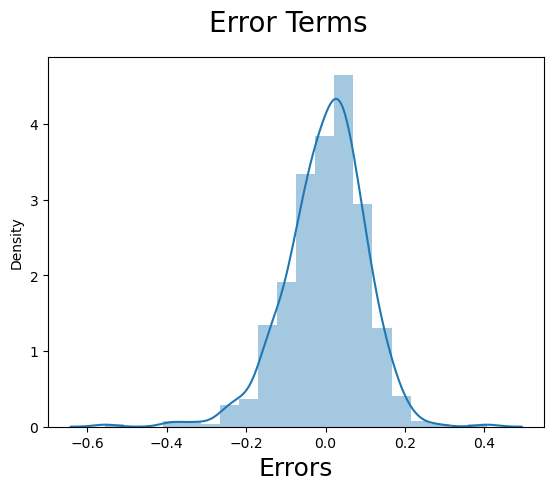

In [476]:
# Plotting histogram for the error terms.
fig = plt.figure()
sns.distplot((y_train - y_train_prd), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 6: Making prediction using the final model on the test set 

In [477]:
# Applying MinMax scaler to all the varaibles expect Dummy and yes/no variables  
scale_list = ['Temprature', 'Feel_temp', 'Humidity', 'Windspeed', 'Total_users']

# Fitting on train set and Transfporming using test set so that the model dose not learn test data.
df_test[scale_list] = scaler.transform(df_test[scale_list])
df_test[scale_list].head()

,Temprature,Feel_temp,Humidity,Windspeed,Total_users
185,0.831783,0.769660,0.657364,0.084219,0.692706
536,0.901354,0.842587,0.610133,0.153728,0.712034
300,0.511964,0.496145,0.837699,0.334206,0.303382
222,0.881625,0.795343,0.437098,0.339570,0.547400
153,0.817246,0.741471,0.314298,0.537414,0.569029


In [478]:
df_test.describe()

,Year,Holiday,Workingday,Temprature,Feel_temp,Humidity,Windspeed,Total_users,spring,summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.300000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y 

In [479]:
y_test = df_test.pop('Total_users') 
x_test = df_test

In [480]:
# Creating another model
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,Year,Holiday,Workingday,Temprature,Feel_temp,Humidity,Windspeed,spring,summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
185,1.0,0,1,1,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,1,0,0,0,0,0
536,1.0,1,0,0,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,0,0,0,0,0,1
300,1.0,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,1,0,0,0,0,1,0,0
222,1.0,0,0,0,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,0,0,1
153,1.0,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,0,0,0,0,1,0,0


In [481]:
print(x_test_sm.shape)

(220, 30)


In [482]:
x_test_sm.drop(['winter','July','Temprature','Humidity','Sunday','Febrauary','May','Monday','Tuesday',
                'August','Holiday','Feel_temp','June','October','Wednesday','Thursday','March'], axis=1, inplace=True)

In [483]:
# Predict
y_test_prd = lm_model.predict(x_test_sm)

In [484]:
# Evaluate the model
import sklearn
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_test_prd)

0.7852321368887232

Seeing the R-squared value for both the train and test model which do not change much, we can conclude that we have a decent model. However we could have a better model.